In [1]:
import sys

sys.path.append('../')

In [2]:
from src.CharFuncInverter.Bohman.BohmansInverters import BohmanE

In [3]:
from  tests.levy import Levy


In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
l = Levy(2, -5)
x = np.linspace(-5, 5, 100)
x = x[x!=0]

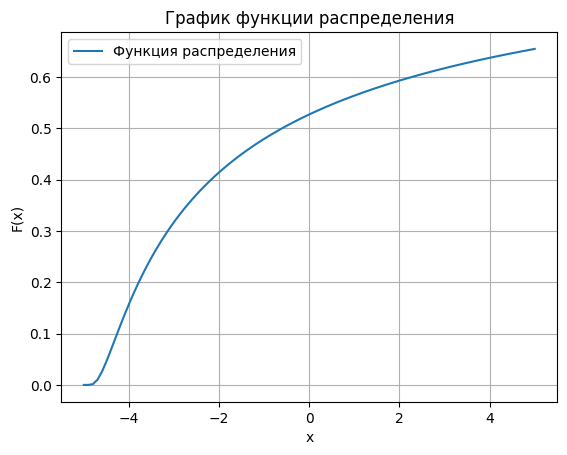

In [8]:
F_x = l.cdf(x)

plt.plot(x, F_x, label='Функция распределения')
plt.title('График функции распределения')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.grid()
plt.legend()
plt.show()

In [9]:
inv = BohmanE()
inv.fit(l.chr)

/Users/lily/myenv/lib/python3.13/site-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/lily/myenv/lib/python3.13/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


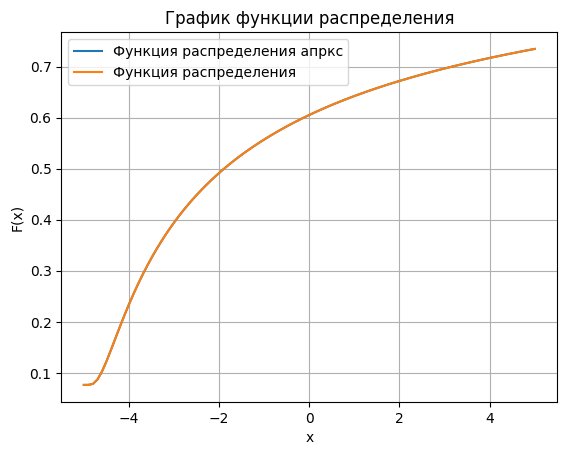

In [10]:
x = np.linspace(-5, 5, 100)

F_x = inv.cdf(x)
F_true = inv.cdf(x)

plt.plot(x, F_x, label='Функция распределения апркс')
plt.plot(x, F_true, label='Функция распределения')
plt.title('График функции распределения')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.grid()
plt.legend()
plt.show()

In [11]:
class FTInverterNaive():

    def __init__(self, N=1e3, delta=1e-1, num_points = None):
        super().__init__()
        self.N = int(N)
        self.delta = delta
        if num_points is None:
            self.num_points = int(N // delta)
        else:
            self.num_points = num_points

    def fit(self, phi):
        """phi = characteristic function"""
        self.phi = phi

    def cdf(self, x):
        t = np.linspace(-self.N, self.N, self.num_points)
        t = t[t!=0]
    
    
        phi_t = self.phi(t)

        
        #print(list((phi_t * np.exp(-1j * t * x[:, np.newaxis]))/(1j*t)))
        integral = np.trapezoid((phi_t * np.exp(-1j * t * x[:, np.newaxis]))/(1j*t), t, axis=1)
        #print(integral)
        return 1/2 - (1 / (2 * np.pi)) * integral

    def pdf(self, x):
        t = np.linspace(-self.N, self.N, self.num_points)

        phi_t = self.phi(t)

        integral = np.trapezoid(phi_t * np.exp(-1j * t * x[:, np.newaxis]), t, axis=1)

        return (1 / (2 * np.pi)) * integral

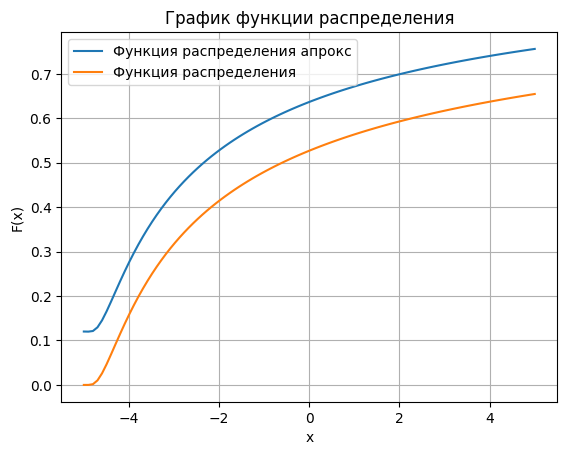

In [13]:
inv = FTInverterNaive(num_points=10000)
inv.fit(l.chr)

x = np.linspace(-5, 5, 100)

F_x = inv.cdf(x)

F_true = l.cdf(x)
plt.plot(x, F_x, label='Функция распределения апрокс')
plt.plot(x, F_true, label='Функция распределения')
plt.title('График функции распределения')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.grid()
plt.legend()
plt.show()